# 라이브러리 Import

In [ ]:
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/content/test_scores.csv')

In [ ]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [ ]:
df.tail()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0
2132,ZOWMK,Urban,Public,ZBH,Standard,30.0,ZVCQ8,Male,Qualifies for reduced/free lunch,41.0,48.0


In [ ]:
df.info()
df['school_setting'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


Urban       906
Suburban    717
Rural       510
Name: school_setting, dtype: int64

## 데이터 전처리

In [ ]:
df1 = df.drop(['school','classroom','student_id'], axis=1)
df1

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...
2128,Urban,Public,Standard,30.0,Female,Does not qualify,39.0,55.0
2129,Urban,Public,Standard,30.0,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,Urban,Public,Standard,30.0,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,Urban,Public,Standard,30.0,Male,Qualifies for reduced/free lunch,46.0,53.0


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


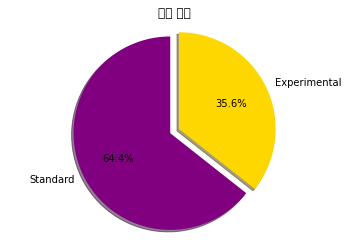

In [ ]:
# import matplotlib.pyplot as plt

# labels = df1['teaching_method'].unique()
# # sizes = [15, 30, 45, 10]
# sizes = df1['teaching_method'].value_counts()
# # colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
# colors = ['purple', 'gold']
# explode = (0, 0.1)
# plt.title("파이 차트")
# plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#         autopct='%1.1f%%', shadow=True, startangle=90)
# plt.axis('equal')
# plt.show()

In [ ]:
df1['teaching_method'].value_counts()

Standard        1373
Experimental     760
Name: teaching_method, dtype: int64

In [ ]:
df['gender'].value_counts()

Male      1077
Female    1056
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='posttest'>

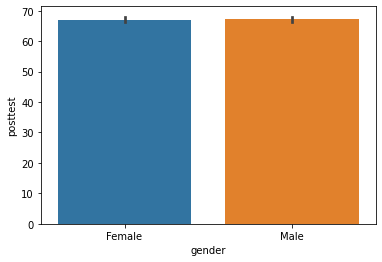

In [ ]:
sns.barplot(data=df1, x='gender', y='posttest')

## 원-핫 인코딩

In [ ]:
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values
X

array([['Urban', 'Non-public', 'Standard', ..., 'Female',
        'Does not qualify', 62.0],
       ['Urban', 'Non-public', 'Standard', ..., 'Female',
        'Does not qualify', 66.0],
       ['Urban', 'Non-public', 'Standard', ..., 'Male',
        'Does not qualify', 64.0],
       ...,
       ['Urban', 'Public', 'Standard', ..., 'Female',
        'Qualifies for reduced/free lunch', 45.0],
       ['Urban', 'Public', 'Standard', ..., 'Male',
        'Qualifies for reduced/free lunch', 46.0],
       ['Urban', 'Public', 'Standard', ..., 'Male',
        'Qualifies for reduced/free lunch', 41.0]], dtype=object)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [0, 1, 2, 4, 5])], remainder='passthrough')
ct
X = ct.fit_transform(X)
X

array([[0.0, 1.0, 0.0, ..., 0.0, 20.0, 62.0],
       [0.0, 1.0, 0.0, ..., 0.0, 20.0, 66.0],
       [0.0, 1.0, 0.0, ..., 0.0, 20.0, 64.0],
       ...,
       [0.0, 1.0, 1.0, ..., 1.0, 30.0, 45.0],
       [0.0, 1.0, 1.0, ..., 1.0, 30.0, 46.0],
       [0.0, 1.0, 1.0, ..., 1.0, 30.0, 41.0]], dtype=object)

## 데이터 세트 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
X, len(X)


(array([[0.0, 1.0, 0.0, ..., 0.0, 20.0, 62.0],
        [0.0, 1.0, 0.0, ..., 0.0, 20.0, 66.0],
        [0.0, 1.0, 0.0, ..., 0.0, 20.0, 64.0],
        ...,
        [0.0, 1.0, 1.0, ..., 1.0, 30.0, 45.0],
        [0.0, 1.0, 1.0, ..., 1.0, 30.0, 46.0],
        [0.0, 1.0, 1.0, ..., 1.0, 30.0, 41.0]], dtype=object), 2133)

In [ ]:
X_train, len(X_train) # 훈련 세트 X, 개수

(array([[1.0, 0.0, 0.0, ..., 1.0, 19.0, 65.0],
        [1.0, 0.0, 1.0, ..., 1.0, 21.0, 62.0],
        [0.0, 1.0, 1.0, ..., 1.0, 30.0, 34.0],
        ...,
        [0.0, 0.0, 1.0, ..., 0.0, 22.0, 43.0],
        [1.0, 0.0, 1.0, ..., 0.0, 21.0, 54.0],
        [0.0, 1.0, 1.0, ..., 0.0, 27.0, 52.0]], dtype=object), 1706)

In [ ]:
X_test, len(X_test) # 테스트 세트 X, 개수

(array([[0.0, 0.0, 1.0, ..., 1.0, 23.0, 36.0],
        [0.0, 0.0, 0.0, ..., 1.0, 20.0, 55.0],
        [0.0, 1.0, 1.0, ..., 1.0, 31.0, 48.0],
        ...,
        [1.0, 0.0, 1.0, ..., 0.0, 23.0, 75.0],
        [1.0, 0.0, 1.0, ..., 0.0, 20.0, 48.0],
        [1.0, 0.0, 1.0, ..., 0.0, 21.0, 84.0]], dtype=object), 427)

In [ ]:
y, len(y) # 전체 데이터 y

(array([72., 79., 76., ..., 51., 53., 48.]), 2133)

In [ ]:
y_train, len(y_train) # 훈련 세트 y

(array([74., 72., 46., ..., 58., 68., 62.]), 1706)

In [ ]:
y_test, len(y_test) # 테스트 세트 y

(array([ 40.,  75.,  58.,  67.,  79.,  68.,  51.,  65.,  40.,  78.,  98.,
         83.,  63.,  50.,  87.,  53.,  57.,  59.,  66.,  45.,  78.,  55.,
         63.,  68.,  81.,  47.,  72.,  37.,  55.,  76.,  77.,  53.,  70.,
         83.,  58.,  69.,  59.,  52.,  72.,  62.,  79.,  40.,  63.,  66.,
         40.,  72.,  75.,  72.,  77.,  88.,  80.,  48.,  70.,  72.,  49.,
         56.,  54.,  74.,  69.,  77.,  40.,  70.,  72.,  59.,  93.,  76.,
         72.,  68.,  71.,  95.,  71.,  77.,  57.,  41.,  61.,  57.,  64.,
         58.,  66.,  92.,  59.,  56.,  82.,  55.,  51.,  86.,  62.,  82.,
         83.,  56.,  80.,  70.,  75.,  73.,  80.,  63.,  61.,  62.,  48.,
         56.,  47.,  82.,  69.,  88.,  88.,  46.,  82.,  70.,  87.,  68.,
         69.,  74.,  54.,  54.,  57.,  42.,  68.,  49.,  45.,  97.,  81.,
         79.,  56.,  49.,  52.,  78.,  47.,  64.,  86.,  65.,  73.,  76.,
         48.,  84.,  78.,  68.,  51.,  75.,  71.,  58.,  95.,  75.,  85.,
         46.,  67.,  56.,  53.,  59., 

## 학습(다중 선형 회귀)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train) # 훈련 세트로 학습

LinearRegression()

## 예측 값과 실제 값 비교 (테스트 세트)

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([ 46.82156289,  70.31681414,  57.111252  ,  65.62540444,
        80.48269422,  73.45998778,  48.69794372,  67.83409351,
        40.67024084,  77.0100692 , 102.55366374,  82.43636217,
        63.10044181,  51.79004458,  83.87454599,  53.59880891,
        53.50585641,  60.30943787,  68.34379178,  43.3767363 ,
        79.63707382,  52.26884366,  64.90561621,  68.77235481,
        78.89310105,  39.60749339,  70.14731525,  42.40473763,
        60.59903621,  78.32134947,  77.70428025,  42.24637235,
        68.06992295,  85.87025327,  56.66250137,  71.37884596,
        61.11014465,  51.3644615 ,  78.49488171,  59.75013096,
        83.13057322,  39.58650559,  60.79863751,  64.41616616,
        43.38338733,  72.0303471 ,  75.90232655,  72.21053037,
        78.46069767,  83.25303269,  77.65654627,  45.18550062,
        72.0303471 ,  74.42095196,  50.50670804,  55.18495745,
        57.98940551,  71.87345572,  69.0798014 ,  79.73002631,
        44.20685093,  74.38550305,  75.90232655,  58.79

In [ ]:
y_test

array([ 40.,  75.,  58.,  67.,  79.,  68.,  51.,  65.,  40.,  78.,  98.,
        83.,  63.,  50.,  87.,  53.,  57.,  59.,  66.,  45.,  78.,  55.,
        63.,  68.,  81.,  47.,  72.,  37.,  55.,  76.,  77.,  53.,  70.,
        83.,  58.,  69.,  59.,  52.,  72.,  62.,  79.,  40.,  63.,  66.,
        40.,  72.,  75.,  72.,  77.,  88.,  80.,  48.,  70.,  72.,  49.,
        56.,  54.,  74.,  69.,  77.,  40.,  70.,  72.,  59.,  93.,  76.,
        72.,  68.,  71.,  95.,  71.,  77.,  57.,  41.,  61.,  57.,  64.,
        58.,  66.,  92.,  59.,  56.,  82.,  55.,  51.,  86.,  62.,  82.,
        83.,  56.,  80.,  70.,  75.,  73.,  80.,  63.,  61.,  62.,  48.,
        56.,  47.,  82.,  69.,  88.,  88.,  46.,  82.,  70.,  87.,  68.,
        69.,  74.,  54.,  54.,  57.,  42.,  68.,  49.,  45.,  97.,  81.,
        79.,  56.,  49.,  52.,  78.,  47.,  64.,  86.,  65.,  73.,  76.,
        48.,  84.,  78.,  68.,  51.,  75.,  71.,  58.,  95.,  75.,  85.,
        46.,  67.,  56.,  53.,  59.,  74.,  63.,  5

In [ ]:
reg.coef_

array([ 0.83168441,  0.20352009, -0.01737391, -5.90509206, -0.07426753,
       -1.04334685, -0.10508556,  0.90438216])

In [ ]:
reg.intercept_

23.72085319776125

## 모델 평가

In [ ]:
reg.score(X_train, y_train) # 훈련 세트

0.9461257598618334

In [ ]:
reg.score(X_test, y_test) # 테스트 세트

0.9515806736585357

다양한 평가 지표 (회귀 모델)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred) # 실제 값, 예측 값 # MAE

2.5527201343107317

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred) # MSE

10.020350228685528

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False) # RMSE

3.1654936785098036

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) # R2

0.9515806736585357

In [ ]:
new_data = pd.DataFrame([[19.5, 0, 70.0, 1, 0, 1, 1, 0]], columns=['n_student', 'lunch', 'pretest', 'gender_Male', 'school_setting_Suburban', 'school_setting_Urban', 'school_type_Public', 'teaching_method_Standard'])
pred1 = reg.predict(new_data)
pred1

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([31.6690008])

In [ ]:
!pip install mlxtend -q

from google.colab import files
import joblib # pkl 세이브파일을 만들어주는 라이브러리


joblib.dump(reg, 'multi_LinearRegression_model.pkl')

files.download('multi_LinearRegression_model.pkl') # 다운로드
model_from_joblib = joblib.load('multi_LinearRegression_model.pkl')
model_from_joblib

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LinearRegression()